In [1]:
import os, sys, subprocess
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
n_points = 2000
block_size = 20

num_runs = 10 * (n_points // block_size) * int(np.log(n_points // block_size))

table = defaultdict(list)
for run_no in range(num_runs) :
    print(f"Run #{run_no:6}/{num_runs:6}\r", end='')
    output = subprocess.run(["../bin/test_perf", f"{n_points}"], capture_output=True, encoding='utf-8')
    ignore = list(map(lambda pair: table[pair[0]].append(pair[1]),
                      map(lambda entry: tuple(map(int, entry.split(':'))),
                          output.stdout.split())))

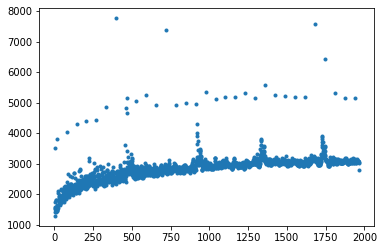

In [3]:
# Generate time plots
avg_times = np.array([[size, np.mean(times)] for size, times in table.items()])
plt.scatter( avg_times[:,0], avg_times[:,1], marker='.' )

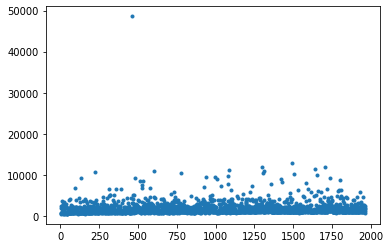

In [4]:
# Estimate deviations from mean.
deviations = np.array([[size, np.std(times)] for size, times in table.items()])
plt.scatter( deviations[:,0], deviations[:,1], marker='.' )

In [5]:
# Club readings into blocks to improve estimators for average operation time and deviation from average.

avg_sizes = []
avg_times = []
avg_deviations = []
for hull_sizes in range(1, n_points, block_size) :
    # avg_times = np.array([[size, np.mean(times)] for size, times in table.items()])
    mean_hull_size = (hull_sizes + block_size - 1) // 2
    readings = []
    for hull_size in range(hull_sizes, hull_sizes + block_size) :
        readings.extend( table[hull_size] )
    avg_sizes.append(mean_hull_size)
    avg_times.append(np.mean(readings))
    avg_deviations.append(np.std(readings))

avg_sizes = np.array(avg_sizes)
avg_times = np.array(avg_times)
avg_deviations = np.array(avg_deviations)


/home/hckr/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hckr/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/hckr/.local/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/hckr/.local/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/hckr/.local/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


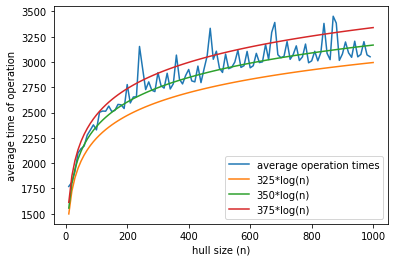

In [6]:
# Generate average running time plot.
plt.xlabel('hull size (n)')
plt.ylabel('average time of operation')

plt.plot(avg_sizes, avg_times, label='average operation times')

for k in (325, 350, 375) :
    plt.plot( avg_sizes, k * np.log(avg_sizes) + 750, label=f'{k}*log(n)' )
plt.legend()

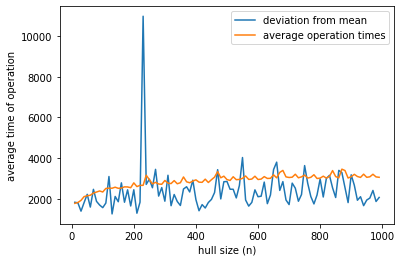

In [7]:
# Generate deviation plot.
plt.xlabel('hull size (n)')
plt.ylabel('average time of operation')

plt.plot(avg_sizes, avg_deviations, label='deviation from mean')
plt.plot(avg_sizes, avg_times, label='average operation times')
plt.legend()